<a href="https://colab.research.google.com/github/harshagarg09/YOLO_OCR/blob/master/2020_07_06_OCR_Yolo_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Configuring Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'OCR/yolo-v3'

#Check if GPU Enabled

In [ ]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

Tue Jul  7 04:38:48 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8    29W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!ln -s /content/gdrive/My\ Drive/ /mydrive


#Go to the folder where darknet to be downloaded

In [ ]:
%cd gdrive/My\ Drive/OCR

/content/gdrive/My Drive/OCR


In [ ]:
!ls

adharCards	 frozen_east_text_detection.pb	panCards.txt  result3
creditCards	 medicalForms			receipts      result4
creditCards.txt  medicalForms.txt		result	      testImages
darknet		 panCards			result2       yolo-v3


#Clone Darknet

In [ ]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 1, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 13785 (delta 0), reused 0 (delta 0), pack-reused 13784
Receiving objects: 100% (13785/13785), 12.38 MiB | 8.85 MiB/s, done.
Resolving deltas: 100% (9407/9407), done.
Checking out files: 100% (2006/2006), done.


#Make Darknet the root directory

This step is necessary as it will generate executable files to be used for training later

In [ ]:
%cd darknet


/content/gdrive/My Drive/OCR/darknet


In [ ]:
# change makefile to have GPU and OPENCV enabled
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile


/content/darknet
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:921:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1122:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
           

#Compile darknet

In [ ]:
!make

chmod +x *.sh


#Download Pre-trained weights

In [ ]:
# get yolov3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-07-07 04:43:50--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   740KB/s    in 7m 6s   

2020-07-07 04:50:57 (569 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]



#Training my dataset

1. Make folder "obj" in "data" folder.
2. Upload the yolo format dataset(images + corresponding .txt files) to "obj" folder.
3. Upload "obj.data" and "obj.names" in "obj" folder.
4. Upload "train.txt" in "obj" folder. ("train.txt" is obtained using "generate_train.py")
5. In "cfg" folder, upload "yolov3_custom.cfg" after making the required changes". (Refer darknet)
6. Upload "darknet53.conv.74" in the "darknet" folder.

All the above steps needed to be done only for the first time

In [ ]:
# training the model
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show

/bin/bash: ./darknet: Permission denied


In [ ]:
%cd darknet

/content/gdrive/My Drive/OCR/darknet


This code needs to be exected only if the training model exists in the google drive and you are returning in other runtime session. (If getting error of Permissions denied).

In [ ]:
!chmod +x ./darknet


#Training the model from last saved weights

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg backup/yolov3_custom_last.weights -dont_show 

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.760906, GIOU: 0.759975), Class: 0.999504, Obj: 0.691648, No Obj: 0.003985, .5R: 1.000000, .75R: 0.333333, count: 3, class_loss = 0.595135, iou_loss = 0.143383, total_loss = 0.738517 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.805587, GIOU: 0.798209), Class: 0.996727, Obj: 0.853281, No Obj: 0.001942, .5R: 1.000000, .75R: 0.714286, count: 7, class_loss = 0.546907, iou_loss = 0.379548, total_loss = 0.926455 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000142, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000738, iou_loss = 0.000000, total_loss = 0.000738 
 total_bbox = 176524, rewritten_bbox = 0.067979 % 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.765574, GIOU: 0.765574), Class: 0.998087, Obj: 0.744025, No Obj:

#Utility functions

In [ ]:
# defining helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

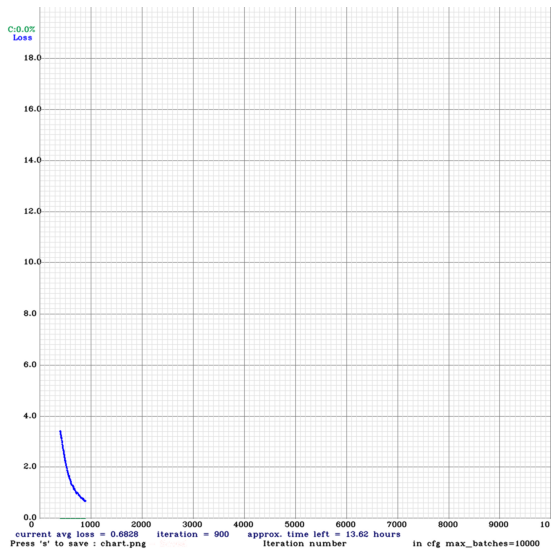

aaaaa


In [ ]:
imShow('chart.png')
print("aaaaa")

#Testing the model

In [ ]:
# need to set my custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom.cfg
%cd ..

/content/gdrive/My Drive/OCR/darknet/cfg
/content/gdrive/My Drive/OCR/darknet


In [ ]:
# run the custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg backup/yolov3_custom_last.weights -thresh 0.3 -ext_output  adhartest2.jpg > result.txt


 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1    104 x 104 x 128 -

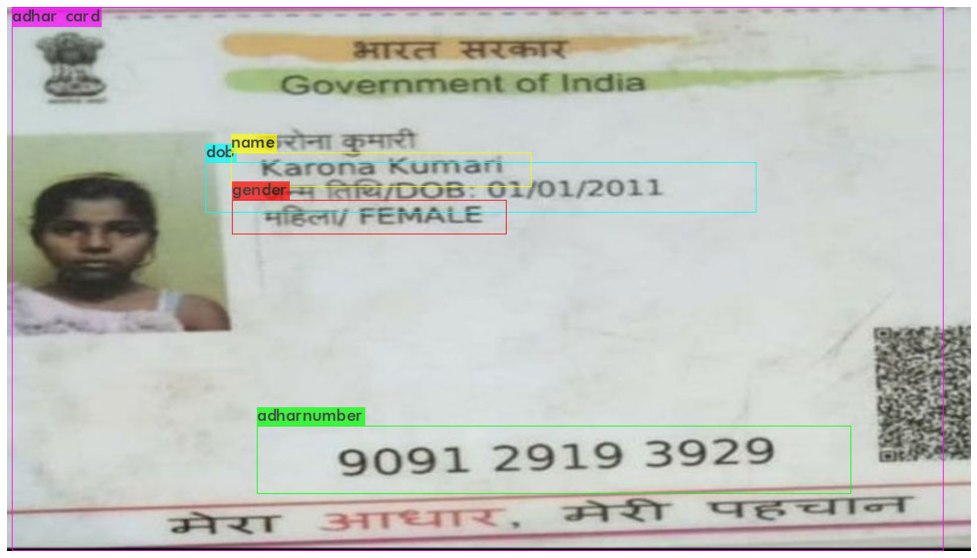

In [ ]:
imShow('predictions.jpg')

In [ ]:
f = open("result.txt", "r")

In [ ]:
contents = f.read()
print(contents)

net.optimized_memory = 0 
mini_batch = 1, batch = 32, time_steps = 1, train = 0 

 seen 64, trained: 57 K-images (0 Kilo-batches_64) 
adhartest2.jpg: Predicted in 91.404000 milli-seconds.
adhar card: 95%	(left_x:    6   top_y:  -23   width: 1159   height:  736)
dob: 87%	(left_x:  248   top_y:  194   width:  685   height:   62)
name: 98%	(left_x:  280   top_y:  182   width:  373   height:   41)
gender: 99%	(left_x:  281   top_y:  241   width:  341   height:   42)
adharnumber: 98%	(left_x:  312   top_y:  521   width:  739   height:   84)



In [ ]:
type(contents)

str

In [ ]:
f1 = f.readline()
for x in f1:
  print(x)

In [ ]:
len(f1)


0

#Installing Tesseract

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 33 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 0s (31.5 MB/s)
debconf: unable to initia

#Importing packages

In [ ]:
# import the necessary packages
from imutils.object_detection import non_max_suppression
import numpy as np
import pytesseract
import argparse
import cv2
import imutils
from skimage.filters import threshold_local
import shutil
import os
import random
try:
 from PIL import Image
except ImportError:
 import Image
from google.colab.patches import cv2_imshow
from pytesseract import Output

#Fetching Adhar Number

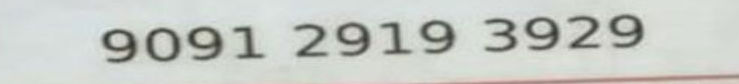

In [ ]:
image = cv2.imread('adharnumber.jpg')
cv2_imshow(image)

In [ ]:
#extracting text from image
extractedInformation = pytesseract.image_to_string(image)
print(extractedInformation)

9091 2919 3929


#Fetching Name

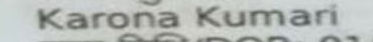

In [ ]:
image = cv2.imread('name.jpg')
cv2_imshow(image)

In [ ]:
#extracting text from image
extractedInformation = pytesseract.image_to_string(image)
print(extractedInformation)

Karona Kumeri_


#Fetching DOB

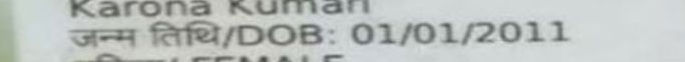

In [ ]:
image = cv2.imread('dob.jpg')
cv2_imshow(image)

In [ ]:
#extracting text from image
extractedInformation = pytesseract.image_to_string(image)
print(extractedInformation)

KRaronma mv
a4 ffel/(DOB: 01/01/2011

DO ee as 5 Bal eS oe,


In [ ]:
import re

In [ ]:
pattern = r'(0[1-9]|[12][0-9]|3[01])[- /.](0[1-9]|1[012])[- /.](19|20)\d\d'
pattern = re.compile(pattern)
print(pattern.search(extractedInformation).group(0))

01/01/2011


#Fetching Gender

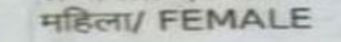

In [ ]:
image = cv2.imread('gender.jpg')
cv2_imshow(image)

In [ ]:
#extracting text from image
extractedInformation = pytesseract.image_to_string(image)
print(extractedInformation)

sifay FEMALE


In [ ]:
pattern = r'FEMALE|MALE|Female|Male|F|M'
pattern = re.compile(pattern)
print(pattern.search(extractedInformation).group(0))

FEMALE
